#  Скачивание с диска

In [1]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:


def dowload_file(_url = "", _out_name = "a.out", batch_size = 1024*1024, prefix_url = "https://getfile.dokpub.com/yandex/get/"):
    """Если хотите скачать с облака то заполняйте префикс - по умолчанию он для Яндекс диска \n
    _url - ссылка на файл \n
    _out_name - имя скачанного файла (пиши с расширением) \n
    batch_size - размер скачанного пакета (не знаешь-не трож) \n
    prefix_url -  url запроса для скачанивания (не знаешь спроси у меня ну или гугли, мне пофиг)""" 

    try:
        response = requests.get(url=(prefix_url+_url), stream=True, allow_redirects=True)
        with open(_out_name, "wb") as file:

            for batch in response.iter_content(chunk_size=batch_size):

                if( batch):
                    file.write(batch)
        
        return True
    except:
        
        return False


In [4]:
folder_m_name = "../model/"
model_name = "model.xyz"


if(not os.path.exists(folder_m_name)):
        os.mkdir(folder_m_name)    

if (dowload_file("https://disk.yandex.ru/d/N_UY4lDG6TIRTw",folder_m_name + model_name ) ):
    print("[DOWLOAD_FILE]---info---> download success")
else:

    raise Exception("[DOWLOAD_FILE]---error---> Пес, чё то пошло не по плану")

[DOWLOAD_FILE]---info---> download success


# Визуализация скаченной сцены

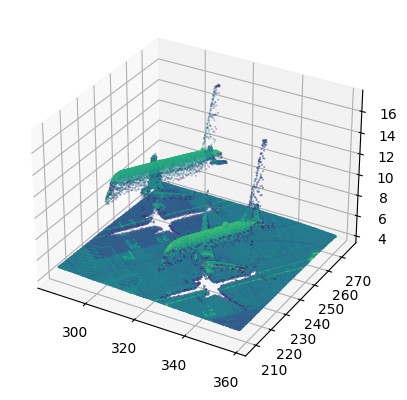

In [5]:
x,y,z,illuminance,reflectance,intensity,nb_of_returns = np.loadtxt(folder_m_name + model_name ,skiprows=1, delimiter=';', unpack=True)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c = intensity, s=0.1)
plt.show()

# Выберем только нужные точки



Отделим землю по среднему значению координаты Z

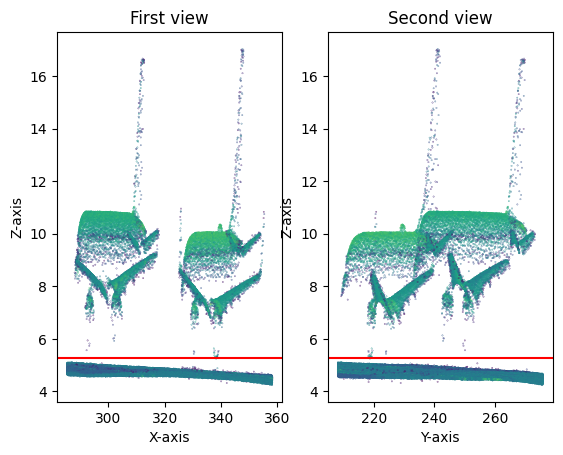

In [6]:


plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("First view")
plt.xlabel('X-axis')
plt.ylabel('Z-axis')

plt.subplot(1, 2, 2) # index 2
plt.scatter(y, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("Second view")
plt.xlabel('Y-axis')
plt.ylabel('Z-axis')

plt.show()


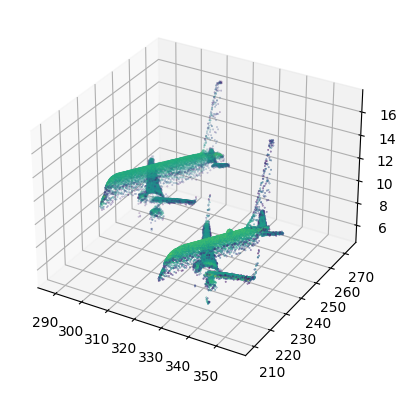

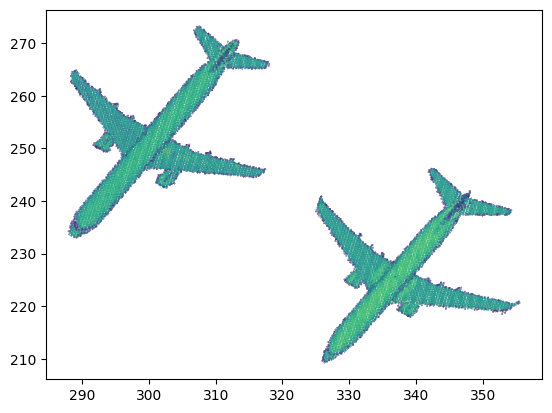

In [7]:
pcd=np.column_stack((x,y,z))
mask=z>np.mean(z)
spatial_query=pcd[z>np.mean(z)]


ax = plt.axes(projection='3d')
ax.scatter(x[mask], y[mask], z[mask], c = intensity[mask], s=0.1)
plt.show()

plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.1)
plt.show()  

# Сегментация через кластеризацию k-means

/home/maksim/anaconda3/envs/Vis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


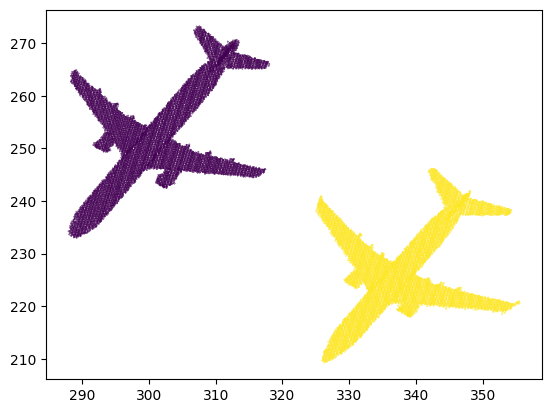

In [8]:
X=np.column_stack((x[mask], y[mask]))
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

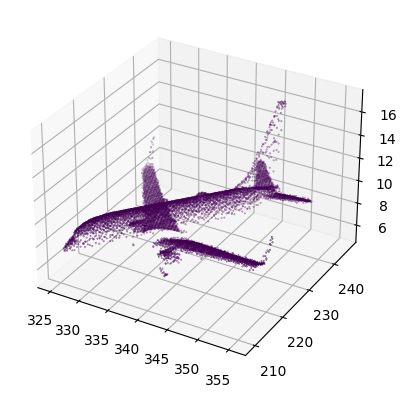

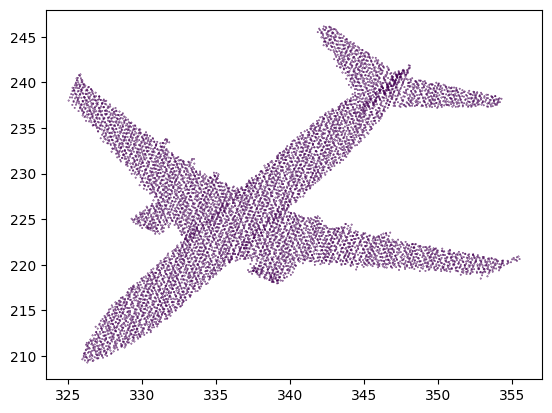

In [72]:
label = list(set(kmeans.labels_))


_x = np.array([], 'float64')
_y = np.array([], 'float64')
_z = np.array([], 'float64')
_label = np.array([])

for x_i ,y_i, z_i, label_i in zip(x[mask], y[mask], z[mask], kmeans.labels_):
    if(label_i == label[1]):
        _x = np.append(_x, x_i)
        _y = np.append(_y, y_i)
        _z = np.append(_z, z_i)
        _label = np.append(_label, label_i)


ax_res = plt.axes(projection='3d')
ax_res.scatter(_x, _y, _z, c=_label, s=0.1)
plt.show()


plt.scatter(_x, _y, c=_label, s=0.1)
plt.show()



